# Exploracion de datos

Vamos a realizar un análisis detallado de tres conjuntos de datos que han sido previamente depurados: las reseñas de usuarios (data_reviews), la información de juegos (data_output) y las interacciones entre ellos (data_items). A través de la aplicación de estadísticas descriptivas y visualizaciones, nuestro objetivo es profundizar en las distribuciones, preferencias y tendencias a lo largo del tiempo, identificando las variables más significativas.

### Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Extraccion de los datos a partir de los archivos csv

In [2]:
df_reviews = pd.read_csv("data2/user_reviews_limpio3.csv")

In [3]:
df_items = pd.read_csv("data2/user_items_limpio.csv")

In [4]:
df_output = pd.read_csv("data2/output_steam_games_limpio2.csv")

# EDA Dataset Output

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [5]:
df_output.shape

(70701, 8)

In [6]:
df_output.columns

Index(['genres', 'app_name', 'title', 'early_access', 'id', 'developer',
       'price_number', 'release_year'],
      dtype='object')

In [7]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70701 entries, 0 to 70700
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        70701 non-null  object 
 1   app_name      70701 non-null  object 
 2   title         70701 non-null  object 
 3   early_access  70701 non-null  bool   
 4   id            70701 non-null  int64  
 5   developer     70701 non-null  object 
 6   price_number  70701 non-null  float64
 7   release_year  70701 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 3.8+ MB


Conclusiones preliminares de la estructura de df_output:
* Se observa que no tenemos valores nulos para ninguna de las variables
* El dataframe contine 70701 registros y 8 columnas donde se detallan caracteristicas de los juegos
* Se puede observar que el dato predominante es el object pero tambien hay tipo bool, int y float

### Columna "Genres"

Esta columna nos brinda informacion acerca de los generos que poseen los juegos, cabe destacar que un juego puede tener mas de un genero asociado al mismo

In [8]:
print("Valores únicos de genres:", df_output["genres"].unique())

Valores únicos de genres: ['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' 'Racing' 'Massively Multiplayer' 'Early Access'
 'Animation &amp; Modeling' 'Video Production' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Photo Editing' 'Accounting']


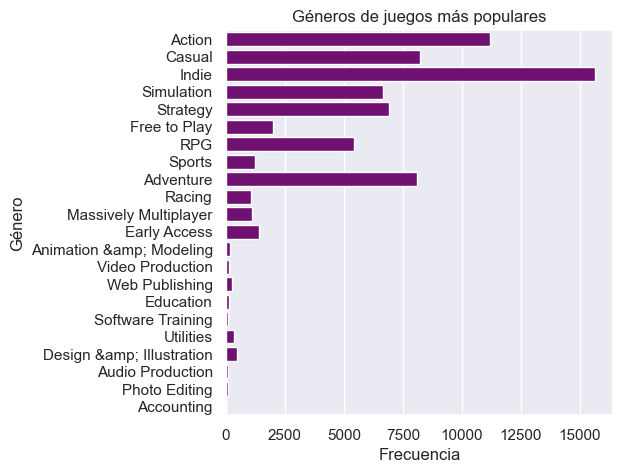

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(data= df_output, y="genres", color="purple")
plt.title("Géneros de juegos más populares")
plt.ylabel("Género")
plt.xlabel("Frecuencia")
plt.show()

In [10]:
ranking_generos = df_output["genres"].value_counts()
ranking_generos.head(5)

genres
Indie        15634
Action       11177
Casual        8211
Adventure     8111
Strategy      6893
Name: count, dtype: int64

Podemos visualizar que el top cinco de generos de juegos mas populares son: Indie, Action, Casual, Adventure y Strategy

### Variable "Developer"

Se procede analizar quienes son los desarrolladores que mas contribuyen a la creacion de juegos de Steam, a partir de la grafica de frecuencia

In [11]:
ranking_developers = df_output["developer"].value_counts()
ranking_developers.head(5)

developer
Ubisoft - San Francisco    2516
SmiteWorks USA, LLC        2364
DL Softworks                495
Ronimo Games                379
Sin datos                   350
Name: count, dtype: int64

En el caso de esta variable solo se grafican el top 10 de desarrolladores dado que son los mas relevantes para el analisis

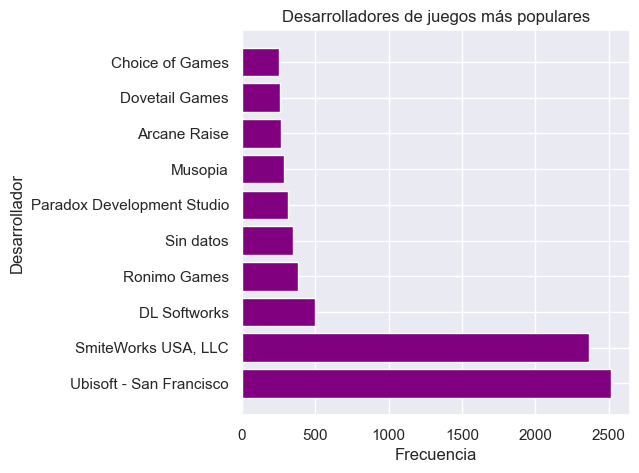

In [12]:
top_10_developer = df_output["developer"].value_counts().head(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer.index, top_10_developer.values, color="purple")
plt.title("Desarrolladores de juegos más populares")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()


Verificamos que hay una clara diferencia de entre frecuencias y que los desarrolladores mas importantes son: Ubisoft - San Francisco y SmiteWorks USA, LLC

### Variables "app_name", "id" y "title"

Las tres variables nos representan los juegos tanto sea para nombrear como para asignarles una serie numerica identificatoria

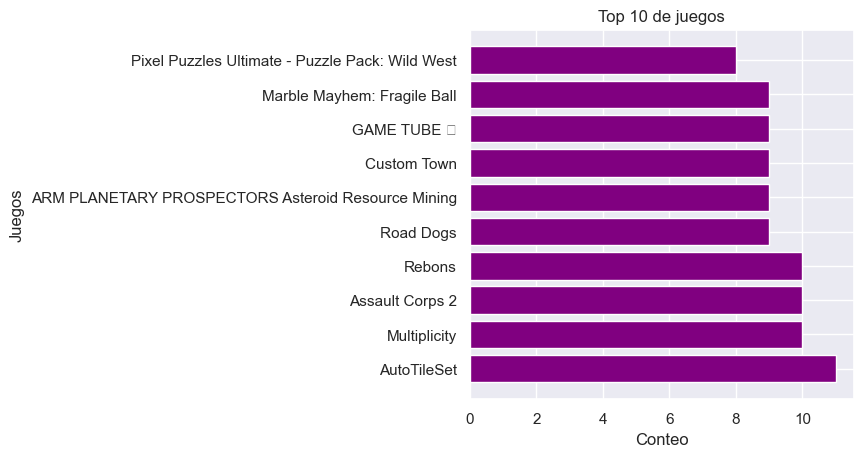

In [21]:
top_10_titles = df_output["title"].value_counts().head(10)

plt.barh(top_10_titles.index, top_10_titles.values, color="purple")
plt.title("Top 10 de juegos")
plt.xlabel("Conteo")
plt.ylabel("Juegos")
plt.subplots_adjust(left=0.3)
plt.show()